In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import kagglehub
import joblib
import networkx as nx
from tqdm import tqdm
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
import swifter
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#  pip install kagglehub
# %pip install tqdm

In [3]:
# Download data from kaggle: https://www.kaggle.com/datasets/kazanova/sentiment140/data
# path = kagglehub.dataset_download("kazanova/sentiment140")

# print("Path to dataset files:", path)

<!-- <p style="color: lightblue;">Sentiment labeling in the dataset:</p>
<ul>
  <li>0 = negative</li>
  <li>2 = neutral</li>
  <li>4 = positive</li>
</ul> -->
Sentiment labeling in the dataset:
- 0 = negative
- 2 = neutral
- 4 = positive

In [4]:
df = pd.read_csv('train.csv', header=None, names=["sentiment", "ids", "date", "flag", "user", "text"])
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.isna().sum()

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

We then create another dataframe where it only have the columns we will be using :

In [7]:
df_cleaned = df[['sentiment', 'text']]
df_cleaned.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


We will map the labels (0 = negative, 1 = positive)

In [8]:
df_cleaned.sentiment = LabelEncoder().fit_transform(df_cleaned.sentiment)
df_cleaned

C:\Users\dell\AppData\Local\Temp\ipykernel_17896\3272369782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.sentiment = LabelEncoder().fit_transform(df_cleaned.sentiment)


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


### Let's check the distribution of sentiments:

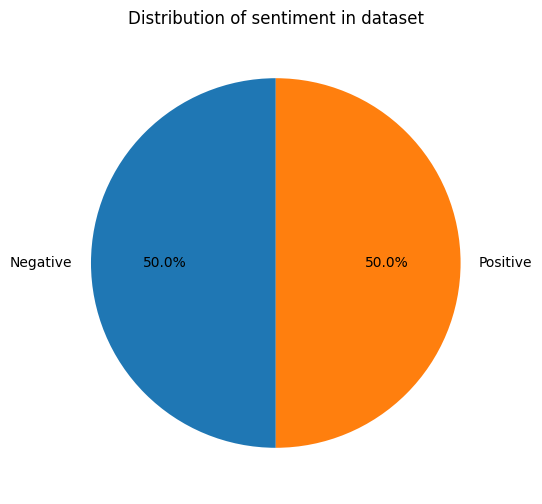

In [9]:

# Pie chart
# Count sentiment values, ensuring no NaNs or invalid entries
sentiment_counts = df_cleaned['sentiment'].value_counts()
labels = sentiment_counts.index.map({0: 'Negative', 1: 'Positive'})

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    sentiment_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of sentiment in dataset')
plt.show()

As we can see there is a balance between positive and negative sentiment.

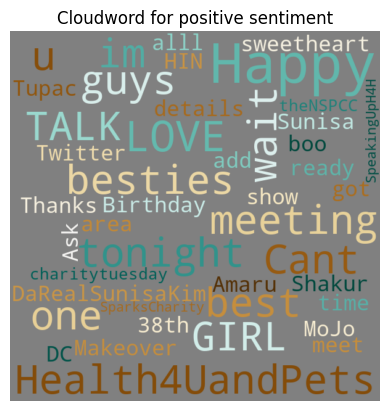

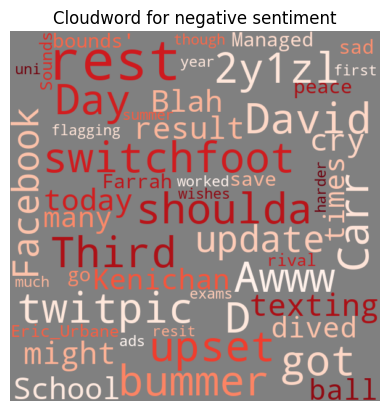

In [10]:
from wordcloud import STOPWORDS
text_positive = str(df_cleaned[df_cleaned['sentiment'] == 1]['text'].values)
text_negative = str(df_cleaned[df_cleaned['sentiment'] == 0]['text'].values)

def plot_word_cloud(text,desc,color) :


    wc = WordCloud(width=600,height=600,background_color="gray", max_words=200, stopwords=STOPWORDS,colormap=color,  max_font_size=90,collocations = False, random_state=42)

    wc.generate(text)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cloudword for {desc}")
    plt.show()


plot_word_cloud(text_positive, "positive sentiment", "BrBG")
plot_word_cloud(text_negative, "negative sentiment", "Reds")

# Preprocessing

In [11]:
class TextPreprocessor:
    def __init__(self):
        # Initialize the word lemmatizer and the emojis dictionary
        self.word_lemmatizer = WordNetLemmatizer()
        self.emojis = {
            ':)': 'smile',
             ':-)': 'smile',
             ';d': 'wink',
             ':-E': 'vampire',
             ':(': 'sad',

            ':-(': 'sad',
             ':-<': 'sad',
             ':P': 'raspberry',
             ':O': 'surprised',

            ':-@': 'shocked',
             ':@': 'shocked',
            ':-$': 'confused',
             ':\\': 'annoyed',

            ':#': 'mute',
             ':X': 'mute',
             ':^)': 'smile',
             ':-&': 'confused',
             '$_$': 'greedy',

            '@@': 'eyeroll',
             ':-!': 'confused',
             ':-D': 'smile',
             ':-0': 'yell',
             'O.o': 'confused',

            '<(-_-)>': 'robot',
             'd[-_-]b': 'dj',
             ":'-)": 'sadsmile',
             ';)': 'wink',
             ';D': 'wink',

            ';-)': 'wink',
             'O:-)': 'angel',
            'O*-)': 'angel',
            '(:-D': 'gossip',
             '=^.^=': 'cat',
             ':D':'smile',
            ':\\': 'annoyed',
        }

    def clean_text(self, text):
        """Cleaning text from unwanted elements"""
        # Remove URLs
        text = re.sub(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text)
        # Remove @username
        text = re.sub(r'@\w+', '', text).strip()
        # Remove email addresses
        text = re.sub(r'[\w\.\-\+]+@([\w\-]+\.)+[\w\-]{2,4}', '', text)
        # Remove quoted text
        text = re.sub(r'["\'].*?["\']', '', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        # Remove "etc."
        text = re.sub(r'\betc\.?\b', '', text, flags=re.IGNORECASE)

        return text

    def filter_non_english_words(self, text):
        """
        Remove all words that contain non-English characters.
        """
        pattern = r'\b(?:[a-zA-Z]+|EMOJI_[a-zA-Z_]+)\b'
        filtered = re.findall(pattern, text)
        return ' '.join(filtered)

    def reduce_len_text(self, text):
        """Reduce text repetitive letters """
        repeat_regexp = re.compile(r'(.)\1+')
        return repeat_regexp.sub(r'\1', text)


    def extract_features(self, text):
        """
        Extract features: link, mail, quote, etc...
        """
        return {
            'links': len(re.findall(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', text)),
            'emails': len(re.findall(r'[\w\.\-\+]+@([\w\-]+\.)+[\w\-]{2,4}', text)),
            'quotes': len(re.findall(r'["\'].*?["\']', text)),
            'hashtags': len(re.findall(r'#\w+', text)),
            'etc_count': len(re.findall(r'\betc\.?\b', text, flags=re.IGNORECASE)),
            'nb_caracter': len(text)
        }

    def lemmatize_text(self, text):
        """
        Lemmatize the words in the text.
        """
        processed_text = []
        for word in text.split():
            if len(word) > 1:
                lemmatized_word = self.word_lemmatizer.lemmatize(word)
                processed_text.append(lemmatized_word)
        return ' '.join(processed_text)

    def handle_emojies(self, text):
        """Replace emojis with text"""
        for emoji, meaning in self.emojis.items():
            text = text.replace(emoji, "EMOJI_" + meaning)
        return text

    def preprocess(self, text):
        """
        Preprocess using all the previous functions
        """
        features = self.extract_features(text)

        cleaned_text = self.clean_text(text)
        replace_emojie = self.handle_emojies(cleaned_text)
        lemmatized_text = self.lemmatize_text(replace_emojie)
        no_repetition = self.reduce_len_text(lemmatized_text)
        clean = self.filter_non_english_words(no_repetition)
        return clean, features

# pre = TextPreprocessor()
# word = "awwwwww"
# pre.reduce_len_text(word)


In [12]:
pre = TextPreprocessor()

# sample_text = "@user Check out this amazing link: https://example.com #awesome etc. 'Quoted text' email@example.com :D"

# cleaned_text, features = preprocessor.preprocess(sample_text)

# print("Cleaned Text:", cleaned_text)
# print("Features:", features)

df_cleaned['cleaned_text'], df_cleaned['features'] = zip(*df_cleaned['text'].apply(pre.preprocess))

features_df = pd.DataFrame(df_cleaned['features'].tolist())
df_cleaned = pd.concat([df_cleaned, features_df], axis=1).drop('features', axis=1)

# last time run : 11m 46s
# last time run : 13m 9s
# last time tun : 16m 4s


C:\Users\dell\AppData\Local\Temp\ipykernel_17896\970105667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'], df_cleaned['features'] = zip(*df_cleaned['text'].apply(pre.preprocess))
C:\Users\dell\AppData\Local\Temp\ipykernel_17896\970105667.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'], df_cleaned['features'] = zip(*df_cleaned['text'].apply(pre.preprocess))


In [13]:
df_cleaned

,sentiment,text,cleaned_text,links,emails,quotes,hashtags,etc_count,nb_caracter
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Aw that s bumer You shoulda got David Car of T...,1,0,0,0,0,115
1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebok by t...,0,0,0,0,0,111
2,0,@Kenichan I dived many times for the ball. Man...,dived many time for the bal Managed to save Th...,0,0,0,0,0,89
3,0,my whole body feels itchy and like its on fire,my whole body fel itchy and like it on fire,0,0,0,0,0,47
4,0,"@nationwideclass no, it's not behaving at all....",no itm mad why am here because can t se you al...,0,0,1,0,0,111
...,...,...,...,...,...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,Just woke up Having no schol is the best felin...,0,0,0,0,0,56
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,TheWDB com Very col to hear old Walt interviews,1,0,0,0,0,76
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,0,0,0,0,0,57
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,Hapy Birthday to my bo of al time Tupac Amaru ...,0,0,0,0,0,65


# TF-IDF

In [14]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1, 2), max_features=10000)
tfidf.fit(df_cleaned.cleaned_text)


TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

In [15]:
from scipy.sparse import vstack

# Liste pour stocker les matrices TF-IDF par lots
sparse_matrices = []

for i in tqdm(range(0, len(df_cleaned), 10000), desc='Batch processing'):
    batch = df_cleaned.cleaned_text[i:i + 10000]
    tfidf_matrix_batch = tfidf.transform(batch)

    # Ajouter la matrice sparse au tableau
    sparse_matrices.append(tfidf_matrix_batch)

# Concaténer toutes les matrices sparse en une seule
final_sparse_matrix = vstack(sparse_matrices)


Batch processing:   0%|          | 0/160 [00:00<?, ?it/s]

Batch processing: 100%|██████████| 160/160 [02:14<00:00,  1.19it/s]


In [16]:
# Créer le DataFrame avec la matrice sparse
df_matrix = pd.DataFrame.sparse.from_spmatrix(final_sparse_matrix, columns=tfidf.get_feature_names_out())
df_matrix['label'] = df_cleaned['sentiment']

The dataset have +1.6m tweets... So we Will have to reduce it to 500 000, based on tf-idf scores and categories


In [20]:
type(final_sparse_matrix)

scipy.sparse._csr.csr_matrix

In [22]:
# tfidf_scores = []
# batch_size = 10000
# for start in tqdm(range(0, df_matrix.shape[0], batch_size)):
#     end = min(start + batch_size, df_matrix.shape[0])
#     batch = df_matrix[start:end]
#     tfidf_scores.extend(batch.mean(axis=1).A1)

# df_cleaned['tfidf_score'] = tfidf_scores
# # Nombre de mots ayant un score TF-IDF non nul
# df_cleaned['tfidf_score'] = (df_matrix > 0).sum(axis=1).A1

tfidf_scores = []
batch_size = 10000  # Ajustez selon votre RAM

# Assurez-vous d'utiliser la matrice sparse générée par le TfidfVectorizer
tfidf_matrix_sparse = tfidf.transform(df_cleaned['cleaned_text'])

for start in tqdm(range(0, tfidf_matrix_sparse.shape[0], batch_size)):
    end = min(start + batch_size, tfidf_matrix_sparse.shape[0])
    batch = tfidf_matrix_sparse[start:end]

    # Calculez la moyenne des scores TF-IDF pour chaque document dans le batch
    batch_scores = batch.mean(axis=1).A1  # .A1 convertit en tableau numpy 1D
    tfidf_scores.extend(batch_scores)

# Ajoutez les scores au DataFrame
df_cleaned['tfidf_score'] = tfidf_scores



In [23]:
df_cleaned

,sentiment,text,cleaned_text,links,emails,quotes,hashtags,etc_count,nb_caracter,tfidf_score
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Aw that s bumer You shoulda got David Car of T...,1,0,0,0,0,115,0.000273
1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebok by t...,0,0,0,0,0,111,0.000294
2,0,@Kenichan I dived many times for the ball. Man...,dived many time for the bal Managed to save Th...,0,0,0,0,0,89,0.000240
3,0,my whole body feels itchy and like its on fire,my whole body fel itchy and like it on fire,0,0,0,0,0,47,0.000190
4,0,"@nationwideclass no, it's not behaving at all....",no itm mad why am here because can t se you al...,0,0,1,0,0,111,0.000216
...,...,...,...,...,...,...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,Just woke up Having no schol is the best felin...,0,0,0,0,0,56,0.000260
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,TheWDB com Very col to hear old Walt interviews,1,0,0,0,0,76,0.000200
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,0,0,0,0,0,57,0.000141
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,Hapy Birthday to my bo of al time Tupac Amaru ...,0,0,0,0,0,65,0.000259


In [39]:
# Features
X = df_matrix.drop('label', axis=1)

# Labels
y = df_matrix['label']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


KeyboardInterrupt: 

In [25]:
# df_positive = df_cleaned[df_cleaned['sentiment'] == 'positive']
# df_negative = df_cleaned[df_cleaned['sentiment'] == 'negative']

df_positive_sorted = df_cleaned[df_cleaned['sentiment'] == 1].sort_values(by='tfidf_score', ascending=False)
df_negative_sorted = df_cleaned[df_cleaned['sentiment'] == 0].sort_values(by='tfidf_score', ascending=False)

In [26]:



# # Étape 3: Trier les tweets par score TF-IDF
# df_positive_sorted = df_positive.sort_values(by='tfidf_score', ascending=False)
# df_negative_sorted = df_negative.sort_values(by='tfidf_score', ascending=False)

# Étape 4: Sélectionner les n premiers tweets (par exemple, 250,000)
df_positive_sample = df_positive_sorted.head(250000)
df_negative_sample = df_negative_sorted.head(250000)

# Combiner les deux échantillons
df_reduced = pd.concat([df_positive_sample, df_negative_sample])
print(f"Reduced dataset size: {len(df_reduced)}")


Reduced dataset size: 500000


In [27]:
df_reduced

,sentiment,text,cleaned_text,links,emails,quotes,hashtags,etc_count,nb_caracter,tfidf_score
914250,1,Well friends we just got in and it has been a ...,Wel friend we just got in and it ha ben long d...,0,0,0,0,0,129,0.000510
1329876,1,It was quite disturbing.But a real band bondin...,It wa quite disturbing But real band bonding m...,0,0,0,0,0,137,0.000501
966186,1,"josh just left for work, going to see mom and ...",josh just left for work going to se mom and da...,0,0,0,0,0,135,0.000500
842216,1,"party last night.. lots of fun, 5am sleep time...",party last night lot of fun slep time glad to ...,0,0,0,0,0,134,0.000500
1275067,1,"Morning all still wanna go back to sleep, got...",Morning al stil wana go back to slep got engli...,0,0,0,0,0,109,0.000498
...,...,...,...,...,...,...,...,...,...,...
449118,0,@FrankieTheSats awwww &lt;3 i'm sure dougie's ...,aw lt is mising you he l be home son though ri...,0,0,1,0,0,96,0.000273
47719,0,Another butt-crack of dawn start. I really nee...,Another but crack of dawn start realy ned some...,0,0,0,0,0,60,0.000273
14333,0,Printing forms to apply for Dan's Visa... and ...,Printing form to aply for Dan s Visa and just ...,0,0,0,0,0,104,0.000273
617369,0,"poor rob Glad he's fine, but i'm sure it was...",por rob Glad hem sure it wa scarey startling t...,0,0,1,0,0,90,0.000273


<Axes: >

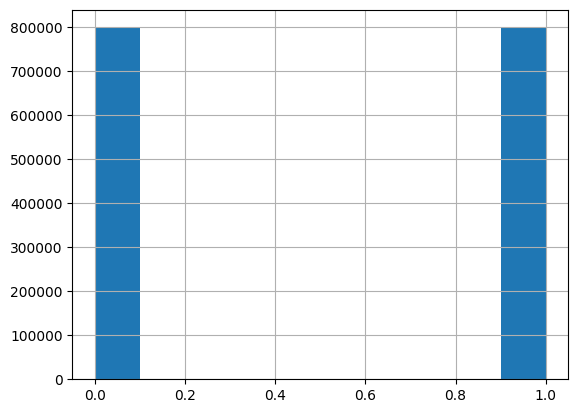

In [29]:
df_matrix.label.hist()

In [ ]:
df_matrix

In [32]:
df_reduced['sentiment'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
X= df_reduced['tfidf_score'].values.reshape(-1, 1)
y = df_reduced['sentiment'].values

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)


In [34]:
def test_model(model_name, statify):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=statify)
    model = model_name
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("f1_score: ",f1_score(y_test, y_pred, average='weighted'))
    return model
# def test_model_batch(model_name, statify):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=statify)

#     model = model_name
#     for i in tqdm(range(0, X_train.shape[0], 10000), desc="Partial_fit"):  # Ajustez la taille des lots
#         batch_X = X_train[i:i + 10000]
#         batch_y = y_train[i:i + 10000]
#         model.partial_fit(batch_X, batch_y, classes=np.unique(y))

#     y_pred = model.predict(X_test)
#     print("f1_score: ", f1_score(y_test, y_pred, average='weighted'))



In [36]:
test_model(SGDClassifier(), y)

f1_score:  0.33333333333333326


SGDClassifier()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = test_model(LogisticRegression(max_iter=1000), y)
LR

f1_score:  0.33333333333333326


LogisticRegression(max_iter=1000)

In [38]:
test_model(RandomForestClassifier(n_jobs=-1), y)

f1_score:  0.33532797545662174


RandomForestClassifier(n_jobs=-1)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# test_model(LogisticRegression(max_iter=1000), y)